In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy


# Create fake and real folders using rearrange_data function

In [ ]:
import os
import shutil

def rearrange_data(src_path, dest_path):
    
    os.makedirs(os.path.join(dest_path, 'fake'), exist_ok=True)
    os.makedirs(os.path.join(dest_path, 'real'), exist_ok=True)

    for folder_name in os.listdir(src_path):
        if 'forg' in folder_name:
            shutil.copytree(os.path.join(src_path, folder_name), os.path.join(dest_path, 'fake', folder_name))
        else:
            shutil.copytree(os.path.join(src_path, folder_name), os.path.join(dest_path, 'real', folder_name))


In [ ]:
src_path = '/content/drive/MyDrive/data/train'
dest_path = '/content/drive/MyDrive/data/train_rearranged'
rearrange_data(src_path, dest_path)

In [ ]:
src_path = '/content/drive/MyDrive/data/test'
dest_path = '/content/drive/MyDrive/data/test_rearranged'
rearrange_data(src_path, dest_path)

In [ ]:
img_height = 256
img_width = 256
batch_size = 30

# loading training data

In [ ]:
 
training_ds = tf.keras.preprocessing.image_dataset_from_directory( 
    os.path.join('/content/drive/MyDrive/data/train_rearranged'),
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1649 files belonging to 2 classes.



# loading testing data

In [ ]:


testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
     os.path.join('/content/drive/MyDrive/data/test_rearranged'),
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 500 files belonging to 2 classes.


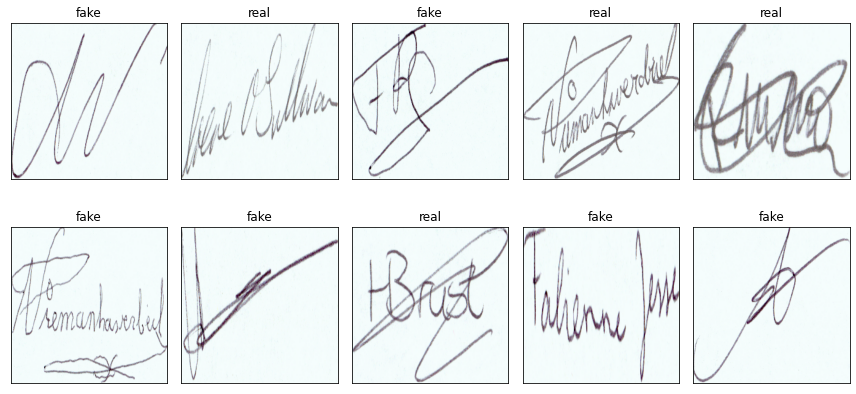

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images(images, labels, class_names, num_images=10, figsize=(12, 6)):
    """Plots a grid of images and their corresponding labels."""

    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=figsize)
    axes = axes.flatten()

    for i in range(num_images):
        axes[i].imshow(images[i].numpy().astype(np.uint8))
        axes[i].set_title(class_names[labels[i]])
        axes[i].set_xticks([])
        axes[i].set_yticks([])

    for ax in axes[num_images:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()
class_names = training_ds.class_names
for images, labels in training_ds.take(1):
    plot_images(images, labels, class_names)

In [ ]:

training_ds = training_ds.cache()
testing_ds = testing_ds.cache()

buffer_size = tf.data.experimental.AUTOTUNE
training_ds = training_ds.prefetch(buffer_size)
testing_ds = testing_ds.prefetch(buffer_size)

# The Model

In [ ]:

MyModel = tf.keras.models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    
    # First convolutional layer 
    layers.Conv2D(32, 3, activation='relu'),
    
    # Average pooling layer 
    layers.AveragePooling2D(),
    
    # Second convolutional layer 
    layers.Conv2D(64, 3, activation='relu'),
    
    # Max pooling layer 
    layers.MaxPooling2D(),
    
    # Third convolutional 
    layers.Conv2D(128, 3, activation='relu'),
    
    # Average pooling layer 
    layers.AveragePooling2D(),
    
    # Fourth convolutional 
    layers.Conv2D(256, 3, activation='relu'),
    
    # Max pooling layer 
    layers.MaxPooling2D(),
    
    # Fifth convolutional layer 
    layers.Conv2D(512, 3, activation='relu'),
    
    # Max pooling layer 
    layers.MaxPooling2D(),
    
    # Global average pooling layer 
    layers.GlobalAveragePooling2D(),
    
    # Dense layer with 
    layers.Dense(64, activation='relu'),
    
    # Output layer with sigmoid activation 
    layers.Dense(len(class_names), activation='sigmoid') 
])

# Compile the model with Adam optimizer and sparse categorical crossentropy loss

In [ ]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
MyModel.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Train the model on the training dataset for 5 epochs and store the results

In [ ]:

history = MyModel.fit(training_ds, validation_data=testing_ds, epochs=5)
history_dict = history.history

Epoch 1/5
55/55 [==============================] - 14s 174ms/step - loss: 0.6938 - accuracy: 0.5282 - val_loss: 0.6794 - val_accuracy: 0.5960
Epoch 2/5
55/55 [==============================] - 4s 75ms/step - loss: 0.5264 - accuracy: 0.7926 - val_loss: 0.2650 - val_accuracy: 0.8820
Epoch 3/5
55/55 [==============================] - 4s 67ms/step - loss: 0.3234 - accuracy: 0.8890 - val_loss: 0.2416 - val_accuracy: 0.9000
Epoch 4/5
55/55 [==============================] - 4s 67ms/step - loss: 0.2523 - accuracy: 0.9115 - val_loss: 0.1562 - val_accuracy: 0.9540
Epoch 5/5
55/55 [==============================] - 4s 69ms/step - loss: 0.2063 - accuracy: 0.9242 - val_loss: 0.1044 - val_accuracy: 0.9760


# Plot the training and testing accuracy over time

Text(0.5, 1.0, 'Training and Testing Accuracy over Epochs')

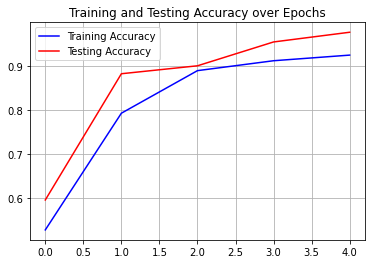

In [ ]:

plt.plot(history_dict['accuracy'], color='blue', label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], color='red', label='Testing Accuracy')
plt.grid(True)
plt.legend()
plt.title('Training and Testing Accuracy over Epochs')

# Plot the training and testing loss over time

Text(0.5, 1.0, 'Training and Testing Loss over Epochs')

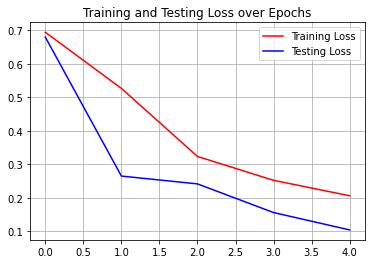

In [ ]:

plt.plot(history_dict['loss'], color='red', label='Training Loss')
plt.plot(history_dict['val_loss'], color='blue', label='Testing Loss')
plt.grid(True)
plt.legend()
plt.title('Training and Testing Loss over Epochs')

# Display the image and the predicted label

Enter the path of the image you want to test: /content/drive/MyDrive/data/test_rearranged/real/049/01_049.png
1/1 [==============================] - 0s 132ms/step


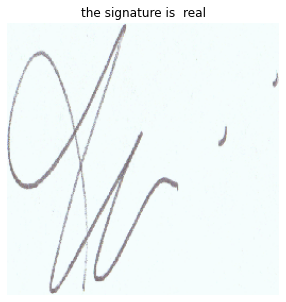

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Set the figure size
plt.figure(figsize=(5, 5))

# Load the image
img_path = input("Enter the path of the image you want to test: ")
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = MyModel.predict(img_array)
pred_label = class_names[np.argmax(predictions)]

plt.imshow(img)
plt.title(f"the signature is  {pred_label}")
plt.axis('off')
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

MyModel.save('/content/drive/MyDrive/forge_real_signature_model/signature_model.hdf5')

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/forge_real_signature_model/signature_model.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>